<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
# Exploratory Data Analysis - Boxing Matches

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Of all the fights, who has won more fights (A or B)?](#section401)<br/>
    - 4.2 [What is the reason of winning the fight ?](#section402)<br/>
    - 4.3 [How is A Boxer's winning most of the fight ?](#section403)<br/>
    - 4.4 [How is B Boxer's winning most of the fight ?](#section404)<br/>
    - 4.5 [How is Split Decision and Newspaper Decision impacting the outcome of a fight?](#section405)<br/>
    - 4.6 [What is the most likely age of the fighters when they are knocking out the opponent?](#section409)<br/>
    - 4.7 [How is the number of past wins,loss, draws and knockouts impacting the result?](#section410)<br/>
    - 4.8 [How was A boxer's and B boxer's past performance?](#section411)<br/>
    - 4.9 [Which group has more boxers with no experience?](#section412)<br/>
    
    

5. [Conclusions](#section5)<br/> 

### 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 

### 2. Data Loading and Description

- The dataset consists information of boxing matches played betweeen team A and B Boxers . Each row represent a boxing match with follwoing information regarding each boxing match like -  boxer's age , height , weight , won , lost , drawn , KOS . decision and result .

- The dataset has 387427 rows and 26 columns . Below are the details and list of columns present - 


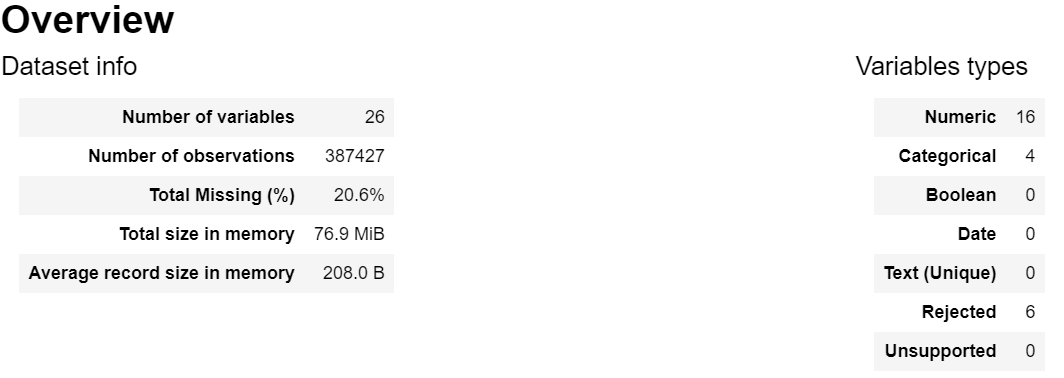

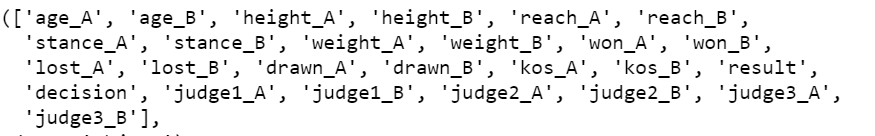

#### Importing packages  

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

#### Importing the Dataset

In [2]:
#Read the Data

df = pd.read_csv('C:/Users/agupt70/Downloads/Term-1-master/Data/Projects/boxing_matches.csv')

## 3. Data Profiling


- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

### 3.1 Understanding the Dataset

In [3]:
df.shape

(387427, 26)

In [4]:
df.head()

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,...,kos_A,kos_B,result,decision,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
0,35.0,27.0,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,160.0,...,33,34.0,draw,SD,110.0,118.0,115.0,113.0,114.0,114.0
1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,...,34,32.0,win_A,UD,120.0,108.0,120.0,108.0,120.0,108.0
2,28.0,26.0,176.0,175.0,NaN,179.0,orthodox,orthodox,154.0,154.0,...,13,33.0,win_B,KO,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,...,32,19.0,win_A,KO,47.0,48.0,49.0,46.0,48.0,47.0
4,25.0,35.0,175.0,170.0,179.0,170.0,orthodox,orthodox,155.0,NaN,...,32,33.0,win_A,UD,118.0,110.0,119.0,109.0,117.0,111.0


In [5]:
df.tail()

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,...,kos_A,kos_B,result,decision,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
387422,20.0,NaN,NaN,NaN,NaN,NaN,orthodox,orthodox,NaN,NaN,...,19,0.0,win_A,KO,NaN,NaN,NaN,NaN,NaN,NaN
387423,20.0,NaN,NaN,NaN,NaN,NaN,orthodox,orthodox,NaN,NaN,...,19,2.0,win_A,PTS,NaN,NaN,NaN,NaN,NaN,NaN
387424,20.0,26.0,NaN,NaN,NaN,NaN,orthodox,orthodox,NaN,NaN,...,18,3.0,win_A,TKO,NaN,NaN,NaN,NaN,NaN,NaN
387425,20.0,NaN,NaN,NaN,NaN,NaN,orthodox,orthodox,NaN,NaN,...,17,0.0,win_A,TKO,NaN,NaN,NaN,NaN,NaN,NaN
387426,20.0,NaN,NaN,NaN,NaN,NaN,orthodox,orthodox,NaN,NaN,...,16,0.0,win_A,KO,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['age_A', 'age_B', 'height_A', 'height_B', 'reach_A', 'reach_B',
       'stance_A', 'stance_B', 'weight_A', 'weight_B', 'won_A', 'won_B',
       'lost_A', 'lost_B', 'drawn_A', 'drawn_B', 'kos_A', 'kos_B', 'result',
       'decision', 'judge1_A', 'judge1_B', 'judge2_A', 'judge2_B', 'judge3_A',
       'judge3_B'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387427 entries, 0 to 387426
Data columns (total 26 columns):
age_A       352888 non-null float64
age_B       257935 non-null float64
height_A    249246 non-null float64
height_B    134640 non-null float64
reach_A     112342 non-null float64
reach_B     37873 non-null float64
stance_A    231009 non-null object
stance_B    231009 non-null object
weight_A    135573 non-null float64
weight_B    130358 non-null float64
won_A       387427 non-null int64
won_B       387427 non-null int64
lost_A      387427 non-null int64
lost_B      387427 non-null int64
drawn_A     387427 non-null int64
drawn_B     387427 non-null int64
kos_A       387427 non-null int64
kos_B       387348 non-null float64
result      387427 non-null object
decision    387427 non-null object
judge1_A    52248 non-null float64
judge1_B    52060 non-null float64
judge2_A    70371 non-null float64
judge2_B    70032 non-null float64
judge3_A    61231 non-null float64
judge3_B    6

In [8]:
df.describe()

,age_A,age_B,height_A,height_B,reach_A,reach_B,weight_A,weight_B,won_A,won_B,...,drawn_A,drawn_B,kos_A,kos_B,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
count,352888.000000,257935.000000,249246.000000,134640.000000,112342.000000,37873.000000,135573.000000,130358.000000,387427.000000,387427.000000,...,387427.000000,387427.000000,387427.000000,387348.000000,52248.000000,52060.000000,70371.000000,70032.000000,61231.000000,61023.000000
mean,24.416041,26.583345,172.786657,172.882657,178.848605,179.001030,146.340636,147.089484,23.108438,15.159080,...,2.826481,2.636375,10.338887,6.234735,62.778901,59.509700,59.560941,56.570411,60.784276,57.995215
std,6.523590,11.823224,9.130127,9.430631,12.002404,14.867537,30.240142,30.624890,27.629901,19.938137,...,5.584610,5.027003,12.392049,8.750690,30.337580,29.285058,31.021367,30.260935,31.910461,31.170590
min,-74.000000,-74.000000,2.000000,15.000000,5.000000,1.000000,10.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,23.000000,166.000000,167.000000,170.000000,171.000000,125.000000,126.000000,5.000000,2.000000,...,0.000000,0.000000,2.000000,0.000000,39.000000,37.000000,39.000000,36.000000,39.000000,36.000000
50%,24.000000,26.000000,173.000000,173.000000,178.000000,178.000000,140.000000,140.000000,14.000000,8.000000,...,1.000000,1.000000,6.000000,3.000000,59.000000,54.000000,58.000000,54.000000,58.000000,54.000000
75%,27.000000,30.000000,178.000000,179.000000,185.000000,185.000000,160.000000,160.000000,31.000000,21.000000,...,3.000000,3.000000,14.000000,9.000000,80.000000,79.000000,80.000000,75.000000,80.000000,78.000000
max,1818.000000,2016.000000,255.000000,255.000000,456.000000,456.000000,363.000000,450.000000,332.000000,251.000000,...,77.000000,76.000000,131.000000,128.000000,540.000000,291.000000,299.000000,294.000000,300.000000,295.000000


In [9]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
##missing_data.head(20)
print(missing_data)

           Total   Percent
reach_B   349554  0.902245
judge1_B  335367  0.865626
judge1_A  335179  0.865141
judge3_B  326404  0.842492
judge3_A  326196  0.841955
judge2_B  317395  0.819238
judge2_A  317056  0.818363
reach_A   275085  0.710031
weight_B  257069  0.663529
height_B  252787  0.652476
weight_A  251854  0.650068
stance_A  156418  0.403735
stance_B  156418  0.403735
height_A  138181  0.356663
age_B     129492  0.334236
age_A      34539  0.089150
kos_B         79  0.000204
won_A          0  0.000000
won_B          0  0.000000
lost_B         0  0.000000
drawn_A        0  0.000000
drawn_B        0  0.000000
kos_A          0  0.000000
result         0  0.000000
decision       0  0.000000
lost_A         0  0.000000


- Here we see most of values are blank for reach and judges , 81% of judge coulmns are missing
- 9 columns dont have any missing values .
-  Kos_B is having 79 values as blank

### 3.2 Pre Profiling

In [10]:
bx_prof_rpt = pandas_profiling.ProfileReport(df)
bx_prof_rpt

Number of variables,26
Number of observations,387427
Total Missing (%),20.6%
Total size in memory,76.9 MiB
Average record size in memory,208.0 B
Numeric,16
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,6


### 3.3 Preprocessing

- Dealing with missing values<br/>
    - Dropping/Replacing missing entries of __columns.__  as it has too many _null_ values.
    - Deleting duplicate rows
    - Replacing missing values of __Age__ with median values.
    - Creating new columns
 

In [11]:
# creating new dataframe to make any datatype changes over it and keep the original dataframe as it is..
bx_temp1 = df.copy(deep=True) 

In [12]:
##bx_temp1 = bx_temp.drop_duplicates(keep = 'first')

## Delete the Duplicate Rows

bx_temp1.drop_duplicates(inplace = True)
df.shape


(387427, 26)

#####  Delete Judge1_A,Judge1_B,Judge2_A,Judge2_B,Judge3_A,Judge3_B since there are too many missing values
#####  Delete height_A,height_B, reach_A, reach_B, weight_A,weight_B since there are too many missing values
####  Delete  stance_A , stance_B ..columns have same values 

In [13]:
bx_temp1.drop(columns = ['judge1_A','judge1_B','judge2_A','judge2_B','judge3_A','judge3_B', 'reach_A', 'reach_B','stance_A','stance_B'],inplace = True)

__Age__ : per pandas profiling we see missing values for both age A and B ..also there are outliers 
    
    - Remove outliers and fill missing values NAN with Median
    
    

In [14]:
df[df['age_B'].isnull()].shape



(129492, 26)

In [15]:
print(" Percentage of missing age A ", (df['age_A'].isnull().sum())/(df['age_A'].isnull().count()))
print(" Percentage of missing age B ", (df['age_B'].isnull().sum())/(df['age_B'].isnull().count()))

 Percentage of missing age A  0.0891496978785681
 Percentage of missing age B  0.3342358689507959


In [16]:
def clean_age(age):
    if age >= 15 and age <=60:
        return age 
    else: 
        return np.nan
 
bx_temp1["clean_age_A"] = bx_temp1["age_A"].apply(clean_age)
print("Stats of Clean Age A ")
print("Minimum Age A :",bx_temp1["clean_age_A"].min())
print("Maximum Age A :",bx_temp1["clean_age_A"].max())
print("How many values are NaN?: ", pd.isnull(bx_temp1['clean_age_A']).sum())

bx_temp1["clean_age_B"] = bx_temp1["age_B"].apply(clean_age)
print("Stats of Clean Age B ")
print("Minimum Age B :",bx_temp1["clean_age_B"].min())
print("Maximum Age B :",bx_temp1["clean_age_B"].max())
print("How many values are NaN?: ", pd.isnull(bx_temp1['clean_age_B']).sum())


bx_temp1 = bx_temp1.drop(['age_A','age_B'], axis= 1)

bx_temp1


Stats of Clean Age A 
Minimum Age A : 15.0
Maximum Age A : 59.0
How many values are NaN?:  31592
Stats of Clean Age B 
Minimum Age B : 15.0
Maximum Age B : 60.0
How many values are NaN?:  118164


,height_A,height_B,weight_A,weight_B,won_A,won_B,lost_A,lost_B,drawn_A,drawn_B,kos_A,kos_B,result,decision,clean_age_A,clean_age_B
0,179.0,175.0,160.0,160.0,37,49,0,1,0,1,33,34.0,draw,SD,35.0,27.0
1,175.0,185.0,164.0,164.0,48,50,1,2,1,1,34,32.0,win_A,UD,26.0,31.0
2,176.0,175.0,154.0,154.0,23,47,0,1,1,1,13,33.0,win_B,KO,28.0,26.0
3,175.0,174.0,155.0,155.0,46,31,1,3,1,0,32,19.0,win_A,KO,25.0,29.0
4,175.0,170.0,155.0,NaN,45,40,1,4,1,0,32,33.0,win_A,UD,25.0,35.0
5,175.0,175.0,NaN,NaN,44,32,1,1,1,0,31,28.0,win_A,KO,24.0,31.0
6,175.0,175.0,155.0,155.0,43,19,1,1,1,2,31,12.0,win_A,SD,23.0,31.0
7,175.0,177.0,155.0,NaN,42,22,1,3,1,0,30,18.0,win_A,TKO,23.0,31.0
8,173.0,175.0,152.0,NaN,44,42,0,0,0,1,26,30.0,win_A,MD,36.0,23.0
9,177.0,175.0,NaN,NaN,26,41,0,0,0,1,14,30.0,win_B,UD,27.0,22.0


In [17]:
Median_Age_A = bx_temp1.clean_age_A.median()
bx_temp1.clean_age_A.fillna(Median_Age_A, inplace= True)
print("Stats of Clean Age A ")
print("Minimum Age A :",bx_temp1["clean_age_A"].min())
print("Maximum Age A :",bx_temp1["clean_age_A"].max())
print("How many values are NaN?: ", pd.isnull(bx_temp1['clean_age_A']).sum())
print("Median age a" , Median_Age_A )

Stats of Clean Age A 
Minimum Age A : 15.0
Maximum Age A : 59.0
How many values are NaN?:  0
Median age a 24.0


In [18]:
Median_Age_B = bx_temp1.clean_age_B.median()
bx_temp1.clean_age_B.fillna(Median_Age_B, inplace= True)
print("Stats of Clean Age A ")
print("Minimum Age B :",bx_temp1["clean_age_B"].min())
print("Maximum Age B :",bx_temp1["clean_age_B"].max())
print("How many values are NaN?: ", pd.isnull(bx_temp1['clean_age_B']).sum())
print("Median age a" , Median_Age_B )

Stats of Clean Age A 
Minimum Age B : 15.0
Maximum Age B : 60.0
How many values are NaN?:  0
Median age a 26.0


- Lets see impact of age 

In [19]:
## Lets create a new column
bx_temp1['age diff'] = bx_temp1['clean_age_A']- bx_temp1['clean_age_B']

__Plot of result when age A increases with respect to B __

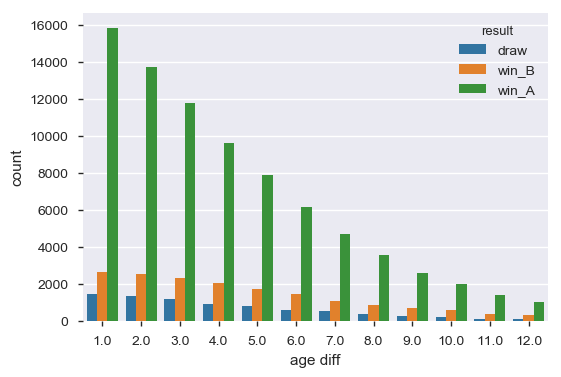

In [20]:
fig, ax =plt.subplots(1,1,figsize=(6,4))
sns.countplot(data = bx_temp1[(bx_temp1['age diff'] > 0) & (bx_temp1['age diff'] <= 12)],x = 'age diff', hue = 'result')

- Looking at the graph we can say that as the age diff decrease chances of match being drawn increases or vice versa.
- As the age diff increase - chances of team A winning decreases significantly
- Boxer A wins over Boxer B irrespective of age .


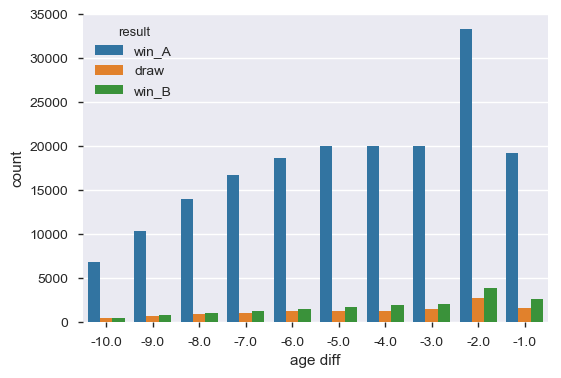

In [21]:
fig, ax =plt.subplots(1,1,figsize=(6,4))
sns.countplot(data = bx_temp1[(bx_temp1['age diff'] < 0) & (bx_temp1['age diff'] >= -10)],x = 'age diff', hue = 'result')

Again we see, as the age difference decreases,the chances of draw siginificantly increases. 

Here we are also see that as the age of Boxer B increases compared to Boxer A, the chance of Boxer B winning decreases significantly

In [22]:
def clean_h(height):
    if height >= 160 and height <=190:
        return height 
    else: 
        return np.nan
 
bx_temp1["clean_height_A"] = bx_temp1["height_A"].apply(clean_h)
print("Stats of Clean height A ")
print("Minimum height A :",bx_temp1["clean_height_A"].min())
print("Maximum height A :",bx_temp1["clean_height_A"].max())
print("How many values are NaN?: ", pd.isnull(bx_temp1['clean_height_A']).sum())
print("How many values are NaN before ?: ", pd.isnull(bx_temp1['height_A']).sum())

bx_temp1["clean_height_B"] = bx_temp1["height_B"].apply(clean_h)
print("Stats of height B ")
print("Minimum height B :",bx_temp1["clean_height_B"].min())
print("Maximum height B :",bx_temp1["clean_height_B"].max())
print("How many values are NaN?: ", pd.isnull(bx_temp1['clean_height_B']).sum())
print("How many values are NaN before ?: ", pd.isnull(bx_temp1['height_B']).sum())

bx_temp1 = bx_temp1.drop(['height_A','height_B'], axis= 1)

bx_temp1


Stats of Clean height A 
Minimum height A : 160.0
Maximum height A : 190.0
How many values are NaN?:  147083
How many values are NaN before ?:  126527
Stats of height B 
Minimum height B : 160.0
Maximum height B : 190.0
How many values are NaN?:  243094
How many values are NaN before ?:  232588


,weight_A,weight_B,won_A,won_B,lost_A,lost_B,drawn_A,drawn_B,kos_A,kos_B,result,decision,clean_age_A,clean_age_B,age diff,clean_height_A,clean_height_B
0,160.0,160.0,37,49,0,1,0,1,33,34.0,draw,SD,35.0,27.0,8.0,179.0,175.0
1,164.0,164.0,48,50,1,2,1,1,34,32.0,win_A,UD,26.0,31.0,-5.0,175.0,185.0
2,154.0,154.0,23,47,0,1,1,1,13,33.0,win_B,KO,28.0,26.0,2.0,176.0,175.0
3,155.0,155.0,46,31,1,3,1,0,32,19.0,win_A,KO,25.0,29.0,-4.0,175.0,174.0
4,155.0,NaN,45,40,1,4,1,0,32,33.0,win_A,UD,25.0,35.0,-10.0,175.0,170.0
5,NaN,NaN,44,32,1,1,1,0,31,28.0,win_A,KO,24.0,31.0,-7.0,175.0,175.0
6,155.0,155.0,43,19,1,1,1,2,31,12.0,win_A,SD,23.0,31.0,-8.0,175.0,175.0
7,155.0,NaN,42,22,1,3,1,0,30,18.0,win_A,TKO,23.0,31.0,-8.0,175.0,177.0
8,152.0,NaN,44,42,0,0,0,1,26,30.0,win_A,MD,36.0,23.0,13.0,173.0,175.0
9,NaN,NaN,26,41,0,0,0,1,14,30.0,win_B,UD,27.0,22.0,5.0,177.0,175.0


In [23]:
Median_height_A = bx_temp1.clean_height_A.median()
bx_temp1.clean_height_A.fillna(Median_height_A, inplace= True)
print("Stats of Clean height A ")
print("Minimum height A :",bx_temp1["clean_height_A"].min())
print("Maximum height A :",bx_temp1["clean_height_A"].max())
print("How many values are NaN?: ", pd.isnull(bx_temp1['clean_height_A']).sum())
print("Median height " , Median_height_A)

Stats of Clean height A 
Minimum height A : 160.0
Maximum height A : 190.0
How many values are NaN?:  0
Median height  173.0


In [24]:
Median_height_B = bx_temp1.clean_height_B.median()
bx_temp1.clean_height_B.fillna(Median_height_B, inplace= True)
print("Stats of Clean height B ")
print("Minimum height B :",bx_temp1["clean_height_B"].min())
print("Maximum height B :",bx_temp1["clean_height_B"].max())
print("How many values are NaN?: ", pd.isnull(bx_temp1['clean_height_B']).sum())
print("Median height " , Median_height_B)

Stats of Clean height B 
Minimum height B : 160.0
Maximum height B : 190.0
How many values are NaN?:  0
Median height  173.0


## 3.4 Post Pandas Profiling

In [25]:
bx_postprof_rpt = pandas_profiling.ProfileReport(bx_temp1)
bx_postprof_rpt

Number of variables,18
Number of observations,356740
Total Missing (%),3.6%
Total size in memory,49.0 MiB
Average record size in memory,144.0 B
Numeric,15
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [26]:
bx_temp2 = bx_temp1.copy(deep=True)
bx_temp2.head(10)

,weight_A,weight_B,won_A,won_B,lost_A,lost_B,drawn_A,drawn_B,kos_A,kos_B,result,decision,clean_age_A,clean_age_B,age diff,clean_height_A,clean_height_B
0,160.0,160.0,37,49,0,1,0,1,33,34.0,draw,SD,35.0,27.0,8.0,179.0,175.0
1,164.0,164.0,48,50,1,2,1,1,34,32.0,win_A,UD,26.0,31.0,-5.0,175.0,185.0
2,154.0,154.0,23,47,0,1,1,1,13,33.0,win_B,KO,28.0,26.0,2.0,176.0,175.0
3,155.0,155.0,46,31,1,3,1,0,32,19.0,win_A,KO,25.0,29.0,-4.0,175.0,174.0
4,155.0,NaN,45,40,1,4,1,0,32,33.0,win_A,UD,25.0,35.0,-10.0,175.0,170.0
5,NaN,NaN,44,32,1,1,1,0,31,28.0,win_A,KO,24.0,31.0,-7.0,175.0,175.0
6,155.0,155.0,43,19,1,1,1,2,31,12.0,win_A,SD,23.0,31.0,-8.0,175.0,175.0
7,155.0,NaN,42,22,1,3,1,0,30,18.0,win_A,TKO,23.0,31.0,-8.0,175.0,177.0
8,152.0,NaN,44,42,0,0,0,1,26,30.0,win_A,MD,36.0,23.0,13.0,173.0,175.0
9,NaN,NaN,26,41,0,0,0,1,14,30.0,win_B,UD,27.0,22.0,5.0,177.0,175.0


- Lets analyse lost, won, drawn and kos columns 

In [62]:
df2 = bx_temp2[(bx_temp2['won_A'] == 0) & (bx_temp2['drawn_A'] == 0) & (bx_temp2['lost_A'] == 0)]
df3 = bx_temp2[(bx_temp2['won_B'] == 0) & (bx_temp2['drawn_B'] == 0) & (bx_temp2['lost_B'] == 0)]

print(df2['result'].value_counts())
print('\n')
print(df3['result'].value_counts())
print(df2.shape)
print(df3.shape)

win_A    13875
win_B     1388
draw       867
Name: result, dtype: int64


win_A    25834
win_B     1785
draw      1547
Name: result, dtype: int64
(16130, 17)
(29166, 17)


- These are the totally new players in team A and B 
- B is more no of new boxers 
- Around 70k boxers are new boxers 
- We also see that new boxers A play excedingly well compared to new boxer B 

In [28]:
dfb = bx_temp2.copy(deep=True)  ## Rename and take backup 

In [30]:
dfb['total match A'] = dfb['won_A'] + dfb['lost_A'] + dfb['drawn_A']
dfb['total match B'] = dfb['won_B'] + dfb['lost_B'] + dfb['drawn_B']

dfb['won percentage A'] = (dfb['won_A']/dfb['total match A'])*100
dfb['won percentage B'] = (dfb['won_B']/dfb['total match B'])*100

## Lets create lost percentage columns

dfb['lost percentage A'] = (dfb['lost_A']/dfb['total match A'])*100
dfb['lost percentage B'] = (dfb['lost_B']/dfb['total match B'])*100

## FIll values for rows new Boxers who has not played any match yet
dfb['lost percentage A'].fillna(0, inplace = True)
dfb['lost percentage B'].fillna(0, inplace = True)
dfb['won percentage A'].fillna(0, inplace = True)
dfb['won percentage B'].fillna(0, inplace = True)


In [31]:
dfb['kos percentage A'] = dfb['kos_A']/dfb['won_A']*100
dfb['kos percentage B'] = dfb['kos_B']/dfb['won_B']*100

In [32]:
dfb['kos percentage A'].fillna(0, inplace = True)
dfb['kos percentage B'].fillna(0, inplace = True)

dfb.head(10)

,weight_A,weight_B,won_A,won_B,lost_A,lost_B,drawn_A,drawn_B,kos_A,kos_B,...,clean_height_A,clean_height_B,total match A,total match B,won percentage A,won percentage B,lost percentage A,lost percentage B,kos percentage A,kos percentage B
0,160.0,160.0,37,49,0,1,0,1,33,34.0,...,179.0,175.0,37,51,100.000000,96.078431,0.000000,1.960784,89.189189,69.387755
1,164.0,164.0,48,50,1,2,1,1,34,32.0,...,175.0,185.0,50,53,96.000000,94.339623,2.000000,3.773585,70.833333,64.000000
2,154.0,154.0,23,47,0,1,1,1,13,33.0,...,176.0,175.0,24,49,95.833333,95.918367,0.000000,2.040816,56.521739,70.212766
3,155.0,155.0,46,31,1,3,1,0,32,19.0,...,175.0,174.0,48,34,95.833333,91.176471,2.083333,8.823529,69.565217,61.290323
4,155.0,NaN,45,40,1,4,1,0,32,33.0,...,175.0,170.0,47,44,95.744681,90.909091,2.127660,9.090909,71.111111,82.500000
5,NaN,NaN,44,32,1,1,1,0,31,28.0,...,175.0,175.0,46,33,95.652174,96.969697,2.173913,3.030303,70.454545,87.500000
6,155.0,155.0,43,19,1,1,1,2,31,12.0,...,175.0,175.0,45,22,95.555556,86.363636,2.222222,4.545455,72.093023,63.157895
7,155.0,NaN,42,22,1,3,1,0,30,18.0,...,175.0,177.0,44,25,95.454545,88.000000,2.272727,12.000000,71.428571,81.818182
8,152.0,NaN,44,42,0,0,0,1,26,30.0,...,173.0,175.0,44,43,100.000000,97.674419,0.000000,0.000000,59.090909,71.428571
9,NaN,NaN,26,41,0,0,0,1,14,30.0,...,177.0,175.0,26,42,100.000000,97.619048,0.000000,0.000000,53.846154,73.170732


In [33]:
##the result has to be a win if any one of the boxer is knocked out
dfb[(dfb['result']== 'draw') & ((dfb['decision']== 'TKO')| (dfb['decision']== 'KO'))].shape

(0, 25)

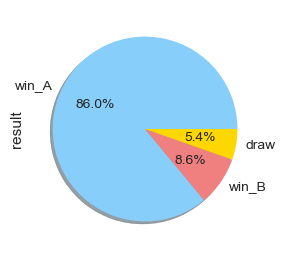

In [34]:
##New Boxer of A
f,ax = plt.subplots(1,1,figsize=(3,3))
colors = ['lightskyblue', 'lightcoral','gold']
dfb[(dfb['total match A']==0)]['result'].value_counts().plot.pie(colors=colors, autopct='%1.1f%%',ax=ax,shadow=True)

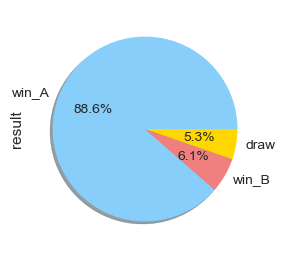

In [35]:
##New Boxer of B
f,ax = plt.subplots(1,1,figsize=(3,3))
colors = ['lightskyblue', 'lightcoral','gold']
dfb[(dfb['total match B']==0)]['result'].value_counts().plot.pie(colors=colors, autopct='%1.1f%%',ax=ax,shadow=True)

### 4. Questions

### 4.1 Of all the fights, who has won more fights (A or B) ?

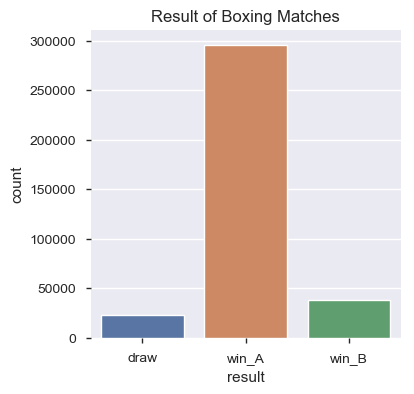

In [36]:
f,ax = plt.subplots(1,1,figsize=(4,4))
sns.set(style="darkgrid")
ax.set_title('Result of Boxing Matches')
sns.countplot(x= 'result', data = dfb,ax=ax)

A has won most no of fights .

### 4.2 What is the reason of winning the fight ?

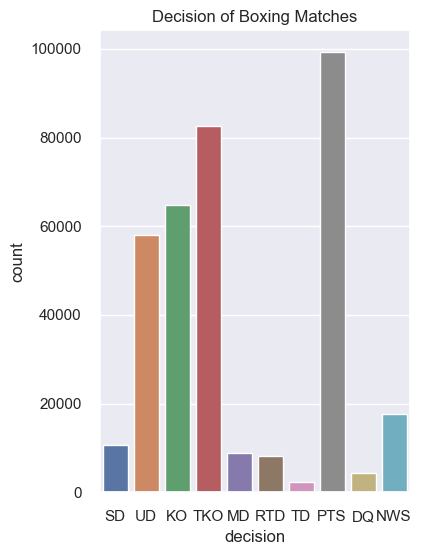

In [37]:
f,ax = plt.subplots(1,1,figsize=(4,6))
ax.set_title('Decision of Boxing Matches')
sns.countplot(x= 'decision', data = dfb,ax=ax)


Most matches are won due to Knocked out (KO , TKO) , then comes PTS throght points ..INfact PTS is more likely decision

### 4.3 How is A Boxer's winning most of the fight ?

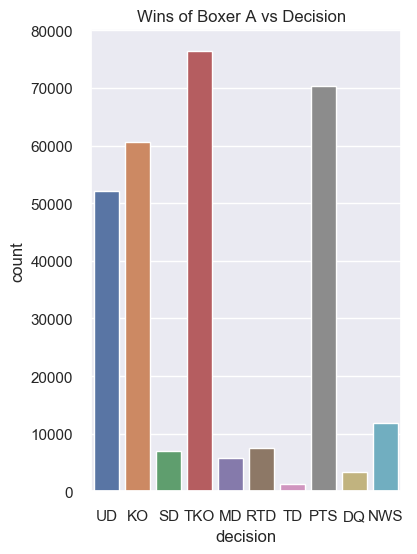

In [38]:
f,ax = plt.subplots(1,1,figsize=(4,6))
ax.set_title('Wins of Boxer A vs Decision  ')
sns.countplot(x= 'decision', data = dfb[dfb['result'] == 'win_A'],ax=ax)



Boxer A won most of the matches through Knockout (KO, TKO) , point system is second most highest reason for A's win 

### 4.4 How is B Boxer's winning most of the fight ?

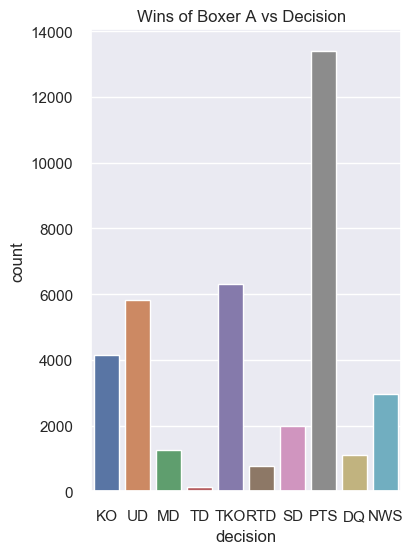

In [39]:
f,ax = plt.subplots(1,1,figsize=(4,6))
ax.set_title('Wins of Boxer A vs Decision  ')
sns.countplot(x= 'decision', data = dfb[dfb['result'] == 'win_B'],ax=ax)

B Boxer's won most matches by PTS points decision, 2nd highest reason of win by Knockout (KO , TKO , UD) .. unanimous decision is also considerably high .

From the above 2 graph its clear that A is more probable to win matches than B  , lets compare win A an win B vs Knockout decision

C:\Users\agupt70\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


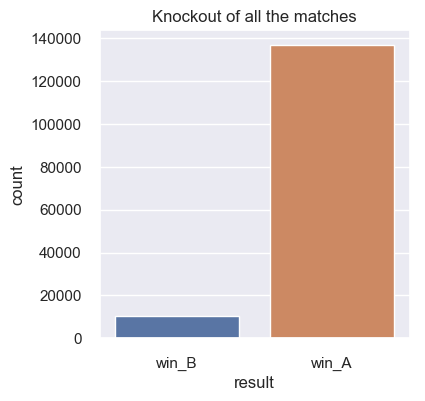

In [40]:
f,ax = plt.subplots(1,1,figsize=(4,4))
ax.set_title('Knockout of all the matches')
sns.countplot(x= 'result', data = dfb[(dfb['decision']== 'TKO') | (df['decision'] == 'KO')],ax= ax)

its clear that most of the Knockouts are done by A Boxers

### 4.5 How is Split Decision and Newspaper Decision impacting the outcome of a fight?   ?

In [41]:
bx_temp2.groupby(['result'])['result'].count()

result
draw      22770
win_A    296102
win_B     37868
Name: result, dtype: int64

C:\Users\agupt70\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Factor plot showing relation btween decision and result  ')

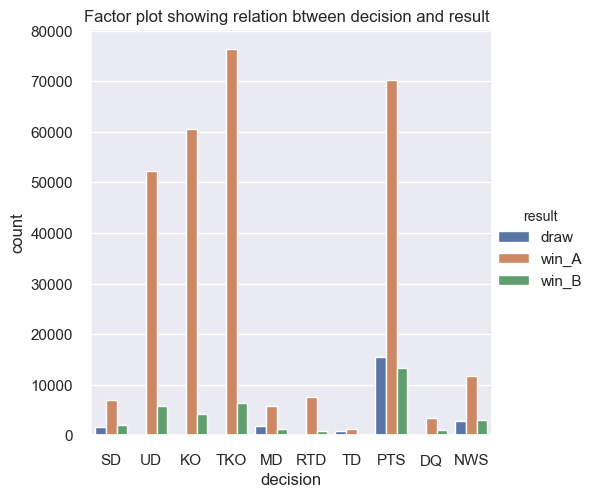

In [42]:
sns.factorplot('decision', hue='result', kind='count', data=bx_temp2);
plt.title('Factor plot showing relation btween decision and result  ')

In [43]:
bx_temp2.groupby(['result','decision'])['result'].count()

result  decision
draw    MD           1872
        NWS          2881
        PTS         15486
        SD           1583
        TD            948
win_A   DQ           3367
        KO          60639
        MD           5720
        NWS         11796
        PTS         70317
        RTD          7522
        SD           7014
        TD           1215
        TKO         76331
        UD          52181
win_B   DQ           1099
        KO           4148
        MD           1258
        NWS          2950
        PTS         13384
        RTD           774
        SD           1996
        TD            137
        TKO          6310
        UD           5812
Name: result, dtype: int64


- Matches which were drawn - decision was either SD split decision or MD mix decision or PTS by points , NWS .
- That is most of the matches ended and played for all three rounds/bouts . and for most draw matches judges gave same score .

- Most of matches won by Boxers A are KO or TKO that is they Knocked out the opponent and matches didnt ended till last .

- matched won by TD techincal decision is very few which is expected .

- result of winners declared NWS newspaper when the match ended without conclusion are good in numbers .

- Most of the matches was decided by Knocked outs and then by points PTS .


### 4.6 What is the most likely age of the fighters when they are knocking out the opponent?

Text(0.5, 6.388888888888884, 'Age for boxer B winning by knockout')

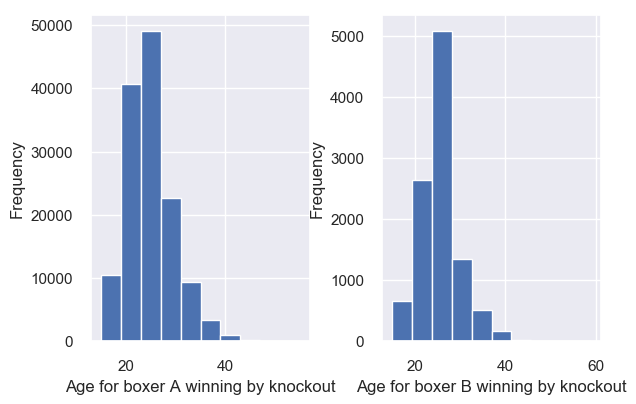

In [44]:
fig, ax = plt.subplots(1,2,figsize=(6,4))
plt.tight_layout()
dfb[((dfb["decision"] == 'KO')| (dfb["decision"] == 'TKO')) & (dfb['result'] == 'win_A')]['clean_age_A'].plot.hist(ax=ax[0])
ax[0].set_xlabel('Age for boxer A winning by knockout')

dfb[((dfb["decision"] == 'KO')| (dfb["decision"] == 'TKO')) & (dfb['result'] == 'win_B')]['clean_age_B'].plot.hist(ax=ax[1])
ax[1].set_xlabel('Age for boxer B winning by knockout')

we see age of both A and B boxer is 20-30 when he wins by knockout , so its 20-30 is most likely age for knockout opponent

after age of 40 boxer mostly dont win by knockout ..



In [45]:
dfb.columns

Index(['weight_A', 'weight_B', 'won_A', 'won_B', 'lost_A', 'lost_B', 'drawn_A',
       'drawn_B', 'kos_A', 'kos_B', 'result', 'decision', 'clean_age_A',
       'clean_age_B', 'age diff', 'clean_height_A', 'clean_height_B',
       'total match A', 'total match B', 'won percentage A',
       'won percentage B', 'lost percentage A', 'lost percentage B',
       'kos percentage A', 'kos percentage B'],
      dtype='object')

### 4.8 How was A boxer's and B boxer's past performance?

Text(0.5, 28.38888888888887, 'Lost Percentage for B')

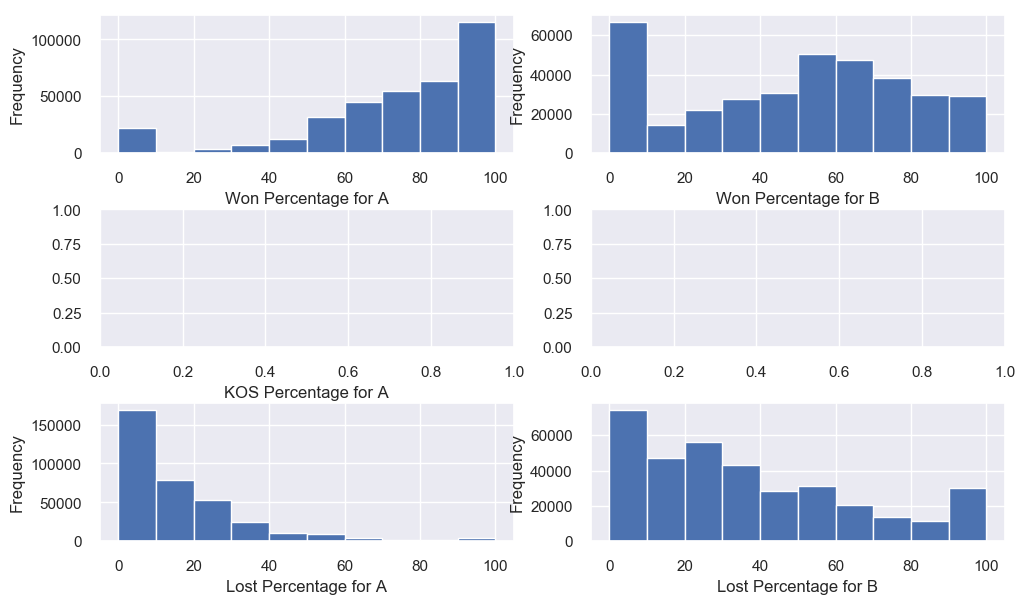

In [51]:
fig, ax =plt.subplots(3,2,figsize=(10,6))
plt.tight_layout() 
dfb['won percentage A'].plot.hist(ax = ax[0,0])
ax[0,0].set_xlabel('Won Percentage for A')
dfb['won percentage B'].plot.hist(ax = ax[0,1])
ax[0,1].set_xlabel('Won Percentage for B')
#dfb['kos percentage A'].plot.hist(ax = ax[1,0])
##ax[1,0].set_xlabel('KOS Percentage for A')
##dfb['kos percentage B'].plot.hist(ax = ax[1,1])
##ax[1,1].set_xlabel('KOS Percentage for B')
dfb['lost percentage A'].plot.hist(ax = ax[2,0])
ax[2,0].set_xlabel('Lost Percentage for A')
dfb['lost percentage B'].plot.hist(ax = ax[2,1])
ax[2,1].set_xlabel('Lost Percentage for B')


This shows that the performance of Boxer A is better than B , 
Most of boxer A won percentage lie between 80 to 100% . Very few boxer have won percentage less 40%
Also almost 50% of boxer A have lost percentage with 10% 

Boxer B has more won percentage in the range of 50%-70%.Huge chunk of B boxers has won percentage < 40%





### 4.9 Which group has more boxers with no experience?

In [53]:
print(dfb[dfb['total match A']== 0].shape)
print(dfb[dfb['total match B']== 0].shape)


(16130, 25)
(29166, 25)


so B is having more new player with no experience 

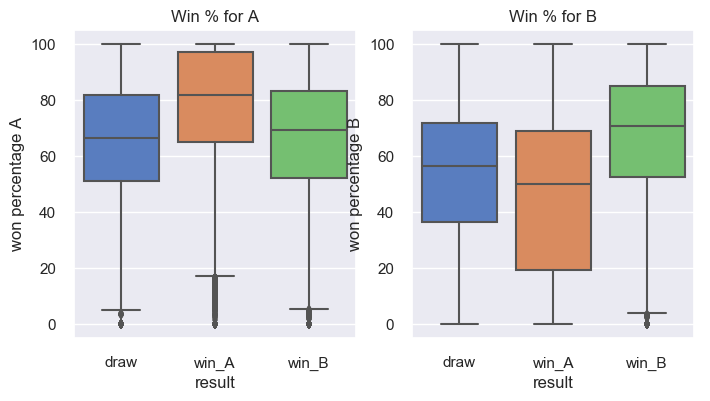

In [54]:
f,ax = plt.subplots(1,2,figsize=(8,4))
sns.set(style="whitegrid", palette="muted")
ax[0].set_title('Win % for A')
ax[1].set_title('Win % for B')
sns.boxplot(x="result", y="won percentage A", data=dfb,ax= ax[0])
sns.boxplot(x="result", y="won percentage B", data=dfb,ax= ax[1])

Boxer A likely to win if won percentage is more than 80% 

Boxer B likely to win if won percentage is more than 70%

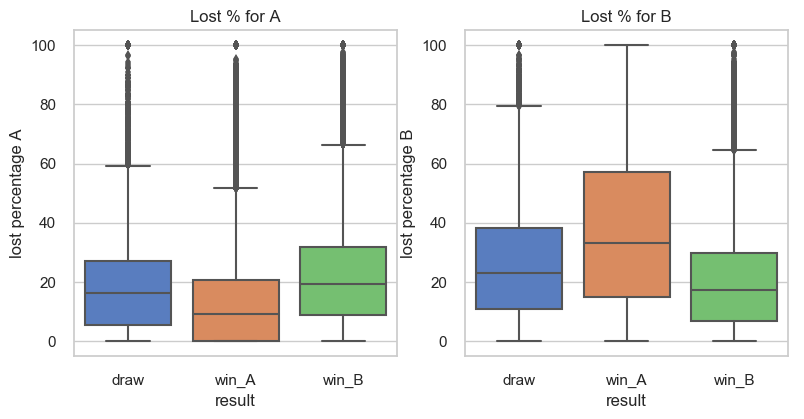

In [57]:
f,ax = plt.subplots(1,2,figsize=(8,4))
sns.set(style="whitegrid", palette="muted")
plt.tight_layout()
ax[0].set_title('Lost % for A')
ax[1].set_title('Lost % for B')
sns.boxplot(x="result", y="lost percentage A", data=dfb,ax= ax[0])
sns.boxplot(x="result", y="lost percentage B", data=dfb,ax= ax[1])

In [59]:
dfb.columns

Index(['weight_A', 'weight_B', 'won_A', 'won_B', 'lost_A', 'lost_B', 'drawn_A',
       'drawn_B', 'kos_A', 'kos_B', 'result', 'decision', 'clean_age_A',
       'clean_age_B', 'age diff', 'clean_height_A', 'clean_height_B',
       'total match A', 'total match B', 'won percentage A',
       'won percentage B', 'lost percentage A', 'lost percentage B',
       'kos percentage A', 'kos percentage B'],
      dtype='object')

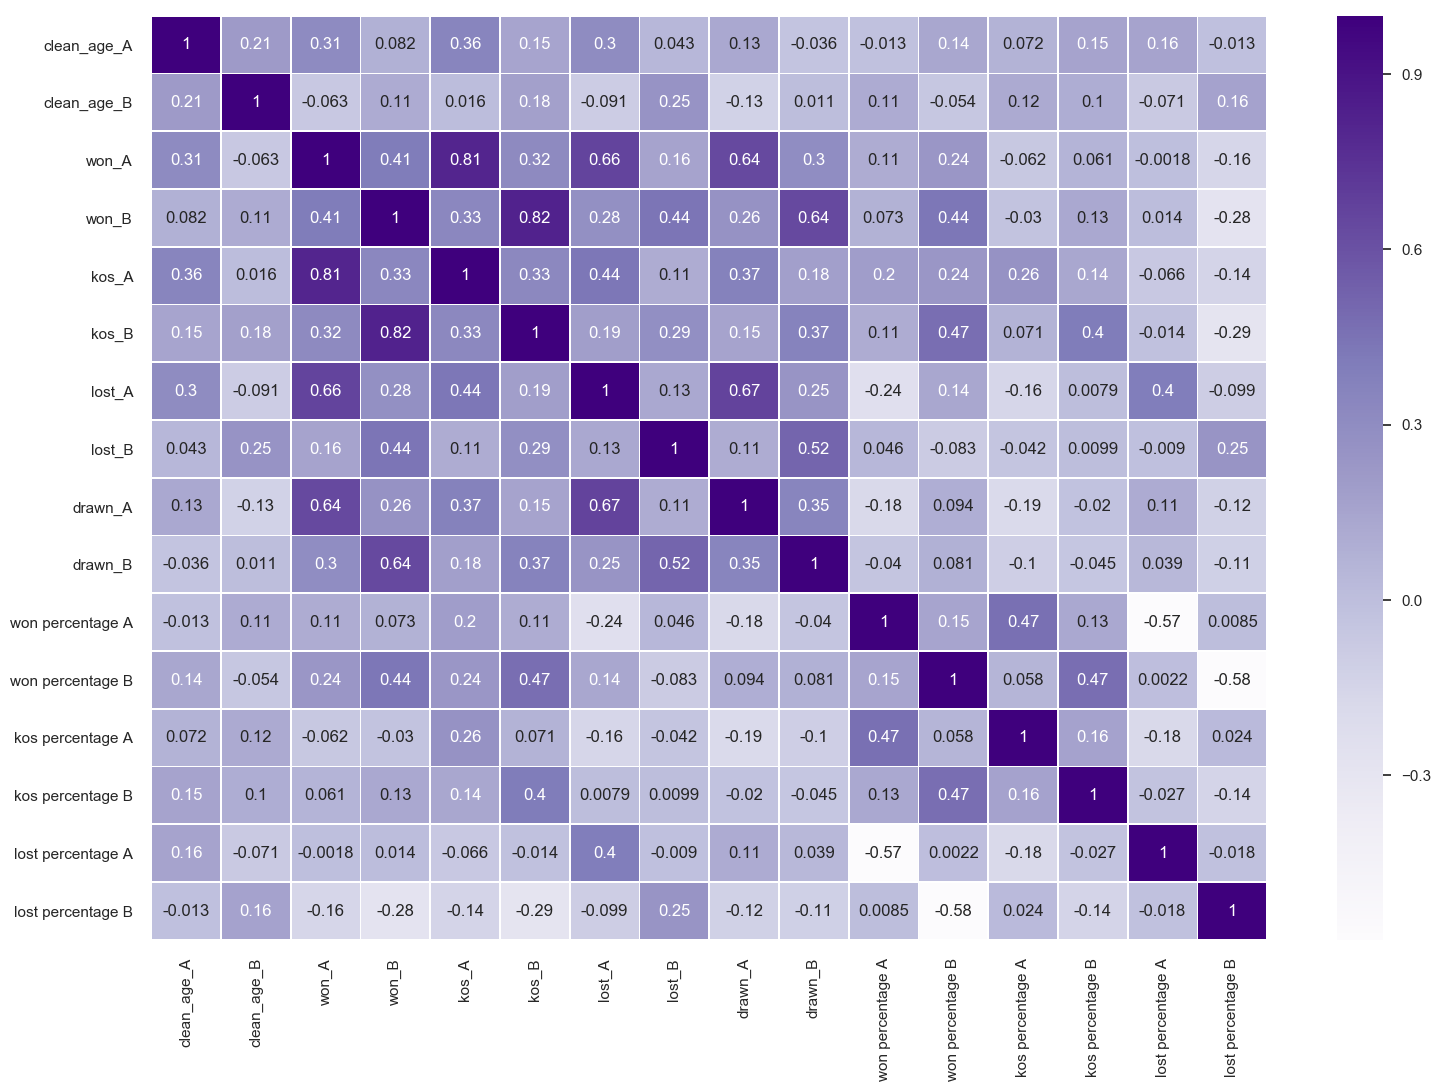

In [60]:
df2 = dfb[['clean_age_A', 'clean_age_B','won_A', 'won_B','kos_A', 'kos_B','lost_A', 'lost_B','drawn_A', 'drawn_B','won percentage A', 'won percentage B','kos percentage A', 'kos percentage B','lost percentage A','lost percentage B' ]]
fig, ax = plt.subplots(figsize=(18,12))         # Sample figsize in inches
sns.heatmap(df2.corr(),annot= True, linewidths=.5, ax=ax,cmap = "Purples")

KOS and won are very tightly correlated 

Won , Lost , Draw are tighly correlated as well

## 5. Conclusion 

- The boxing data helps us understand outcomes of matches 
- Total of __387427__ entries were present out of which around 75111 entries are of new Boxing fights where atleast one of the Team is playing a new Player.
- A Team is winning most of the fights 
- Boxers of A Team are more aggresive than B Team boxers. So they are winning most of the matches by knocking out the opponent.
- A huge chunk of B Boxers has win percentage within 50-70%
- A huge chunk of A Boxers has win percentage within 80-100% and lost percentage <10%
- More new boxers are playing from B Team. New Boxers of B team are playing comparatively younger boxers of A Team. These new boxers are  winning only 7% of the fights 
- Inexperienced Boxer of A Team are playing against older opponent. They are winning most of the fight (87%)
- A Team is winning most of the matches when the decision is undecided or NewsPaper Decision


